In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv('USvideos.csv')
df = pd.DataFrame(data)
df

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029.0,320053.0,5931.0,46245.0,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119.0,185853.0,26679.0,NaN,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,NaN,5845909.0,576597.0,39774.0,170708.0,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103.0,24975.0,4542.0,12829.0,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130.0,96666.0,568.0,6666.0,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09
...,...,...,...,...,...,...,...,...,...,...,...
7993,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393.0,14362.0,390.0,1575.0,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.1
7994,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762.0,1265.0,760.0,1873.0,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.1
7995,EoejGgUNmVU,LP - Lost On You (A Night at The McKittrick Ho...,LP,10,LP|Death Valley|Other People|Lost On You|The M...,142908.0,7088.0,68.0,437.0,https://i.ytimg.com/vi/EoejGgUNmVU/default.jpg,22.1
7996,MT1CMTI0EVw,Tré Melvin @ #YouTubeBlack FanFest Washington ...,YouTube FanFest,24,YouTube FanFest|#YTFF|Washington DC|USA|YTFF|#...,24532.0,2148.0,77.0,NaN,https://i.ytimg.com/vi/MT1CMTI0EVw/default.jpg,22.1


In [2]:
df.isnull().sum()

video_id          102
title               0
channel_title       0
category_id         0
tags              491
views              10
likes              85
dislikes          213
comment_total     253
thumbnail_link      0
date                0
dtype: int64

In [3]:
#removing nan
df = df.dropna()
df.isnull().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [4]:
for i in df.duplicated():
    if i == 'True':
        print('dup found')

In [5]:
count = 0
for i in df['date']:
    if len(i)>5:
        i=i[0:5]

In [6]:
'''
we cannot standardize data as the only fields that have missing values that are numeric are likes,dislikes, views and 
comments. Our data set has 
'''

'\nwe cannot standardize data as the only fields that have missing values that are numeric are likes,dislikes, views and \ncomments. Our data set has \n'

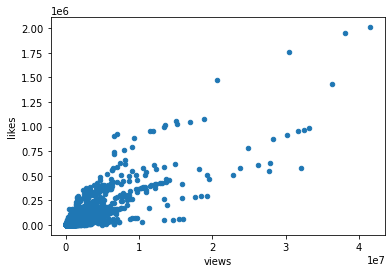

In [7]:
df.plot.scatter(x = 'views', y = 'likes');

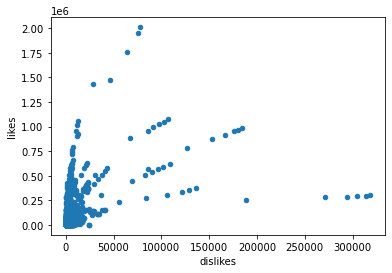

In [8]:
df.plot.scatter(x = 'dislikes', y = 'likes');

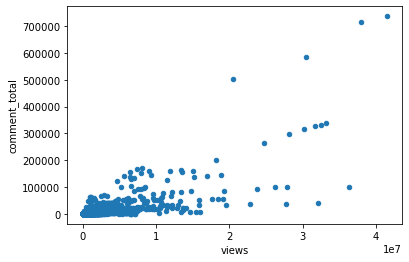

In [9]:
df.plot.scatter(x = 'views', y = 'comment_total');

In [10]:
df.corr(method="pearson")

,category_id,views,likes,dislikes,comment_total
category_id,1.000000,-0.049834,-0.067332,-0.004672,-0.023410
views,-0.049834,1.000000,0.840068,0.532416,0.735582
likes,-0.067332,0.840068,1.000000,0.479948,0.833351
dislikes,-0.004672,0.532416,0.479948,1.000000,0.538410
comment_total,-0.023410,0.735582,0.833351,0.538410,1.000000


In [11]:
a = df.channel_title.value_counts()[:100]
a

Jimmy Kimmel Live                         40
The Tonight Show Starring Jimmy Fallon    38
jacksfilms                                38
NFL                                       38
Vox                                       38
                                          ..
thataylaa                                 17
The Verge                                 17
colinfurze                                17
Amazon Video                              16
The New York Times                        16
Name: channel_title, Length: 100, dtype: int64

OBSERVATIONS

We can see that the above mentioned channels have the most videos and would most likely have a large audience

In [12]:
temp = df[['title','video_id','views',]].groupby('title').agg('sum')\
.sort_values(by = ('views'), ascending = False)[:100]
temp

,views
title,
Eminem Rips Donald Trump In BET Hip Hop Awards Freestyle Cypher,200955871.0
Shakira - Perro Fiel (Official Video) ft. Nicky Jam,133108543.0
BTS (방탄소년단) 'DNA' Official MV,130504484.0
Star Wars: The Last Jedi Trailer (Official),101967218.0
JUSTICE LEAGUE - Official Heroes Trailer,92898692.0
...,...
Joe Arpaio: Last Week Tonight with John Oliver (HBO),14288806.0
Niall Horan - Too Much To Ask (Official),14275401.0
I Dressed Like Store Mannequins For A Week,14222835.0


OBSERVATIONS

We can see that the most viewed videos are mostly music videos

In [13]:
tags = {0}
titles = {0}

for index, row in df.iterrows():
    if row['title'] in temp['views']:
        tags.add(row['tags'])
        titles.add(row['title'])
        
tags.remove(0)
titles.remove(0)

tag_most_viewed = list(tags)
tag_most_viewed

most_viewed_titles = list(titles)
most_viewed_titles

['Mixing All My Eyeshadows Together',
 'Celebrities Read Mean Tweets #11',
 'One More Light (Official Video) - Linkin Park',
 'Niall Horan - Too Much To Ask (Official)',
 'Stranger Things 2 | Final Trailer [HD] | Netflix',
 'Why I Left GMM',
 'GOT7 You Are” M/V',
 'TOYO TIRES | Ken Block’s Climbkhana: Pikes Peak Featuring the Hoonicorn V2',
 'Humble Parody! (Love Song Edition)',
 'Niall Horan - Too Much to Ask (Audio)',
 'I Dressed Like Store Mannequins For A Week',
 'Arnold Set off to the Center of the Earth',
 'finding out i can never run again',
 'Tourist terrified by new glass walkway that cracks under weight',
 'Demi Lovato: Simply Complicated - Official Documentary',
 'Equifax: Last Week Tonight with John Oliver (HBO)',
 'The New Mutants | Official Trailer [HD] | 20th Century FOX',
 'PREGNANT LOOKING?! ASKING MY YOUNGER SELF',
 'Cristiano Ronaldo Reacts To My Football Videos',
 'My Boyfriend Buys My Outfits',
 'Ed Sheeran - Perfect [Official Lyric Video]',
 'MY 2017 YOUTUBE REWIN

OBSERVATIONS

We can see that the videos with these tags are most viewed

In [14]:
df.category_id.value_counts()

24    1484
10    1176
26     847
23     697
22     689
25     509
28     445
17     358
1      325
27     288
15     105
2       98
20      65
19      38
29       3
43       2
Name: category_id, dtype: int64

OBSERVATIONS

We can see that the above mentioned categories have the most videos

In [15]:
temp = df[['channel_title','views',]].groupby('channel_title').agg('sum')\
.sort_values(by = ('views'), ascending = False)[:100]
temp

,views
channel_title,
BETNetworks,200955871.0
ibighit,177106609.0
Warner Bros. Pictures,144240106.0
shakiraVEVO,133108543.0
Logan Paul Vlogs,125692270.0
...,...
Vox,17239866.0
Jaiden Animations,16487744.0
AsapSCIENCE,16463861.0


In [16]:
x={0}
for index, row in df.iterrows():
    if row['channel_title'] in temp['views']:
        #print(row['channel_title'])
        x.add(row['channel_title'])
x.remove(0)
most_viewed_channels = list(x)
most_viewed_channels

['Jaiden Animations',
 'Hannah Stocking',
 'LanaDelReyVEVO',
 'Safiya Nygaard',
 '20th Century Fox',
 'Grand Ole Opry',
 'Unbox Therapy',
 'Logan Paul Vlogs',
 'jacksfilms',
 'Screen Junkies',
 'NiallHoranVEVO',
 'The Tonight Show Starring Jimmy Fallon',
 'Ed Sheeran',
 'IISuperwomanII',
 'The Gabbie Show',
 'shane',
 'AsapSCIENCE',
 'Anwar Jibawi',
 'Bhad Bhabie',
 'Meet Arnold',
 'Rosanna Pansino',
 'shakiraVEVO',
 'Simply Nailogical',
 'CollegeHumor',
 'Maroon5VEVO',
 'SamSmithWorldVEVO',
 'CinemaSins',
 'Paramount Pictures',
 'Warner Bros. Pictures',
 'The Late Show with Stephen Colbert',
 'Kurzgesagt – In a Nutshell',
 'BETNetworks',
 'Linkin Park',
 'Lele Pons',
 'Marques Brownlee',
 'Nike',
 'Netflix',
 'TaylorSwiftVEVO',
 'ImagineDragonsVEVO',
 'Good Mythical Morning',
 'TheEllenShow',
 'jbalvinVEVO',
 'Star Wars',
 'BuzzFeedBlue',
 'RealLifeLore',
 'Demi Lovato',
 'Cracken News',
 'Pitch Perfect',
 'ESPN',
 'Toyo Tire USA Corp',
 'Jimmy Kimmel Live',
 'EverythingApplePro',
 'C

OBSERVATIONS

these are the most viewed channels

OBSERVATIONS

We can see that the channels with the highest number of views

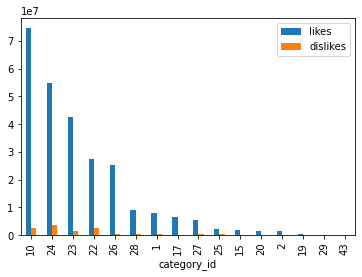

In [17]:
#ratio of likes and dislikes for each category

temp = df[['category_id','likes','dislikes']].groupby('category_id').agg('sum')\
.sort_values(by = ('likes'), ascending = False)
temp.plot.bar()

OBSERVATIONS

We can see that the categories 10,23,24,22 and 26 have the best like to dislike ratio with minimum likes over 1.5 million

In [18]:
most_popular_categories = [10,23,24,22,26]

OBSERVATIONS

We can see that the above mentioned channels have the most videos and would most likely have a large audience

In [19]:
most_viewed_titles

['Mixing All My Eyeshadows Together',
 'Celebrities Read Mean Tweets #11',
 'One More Light (Official Video) - Linkin Park',
 'Niall Horan - Too Much To Ask (Official)',
 'Stranger Things 2 | Final Trailer [HD] | Netflix',
 'Why I Left GMM',
 'GOT7 You Are” M/V',
 'TOYO TIRES | Ken Block’s Climbkhana: Pikes Peak Featuring the Hoonicorn V2',
 'Humble Parody! (Love Song Edition)',
 'Niall Horan - Too Much to Ask (Audio)',
 'I Dressed Like Store Mannequins For A Week',
 'Arnold Set off to the Center of the Earth',
 'finding out i can never run again',
 'Tourist terrified by new glass walkway that cracks under weight',
 'Demi Lovato: Simply Complicated - Official Documentary',
 'Equifax: Last Week Tonight with John Oliver (HBO)',
 'The New Mutants | Official Trailer [HD] | 20th Century FOX',
 'PREGNANT LOOKING?! ASKING MY YOUNGER SELF',
 'Cristiano Ronaldo Reacts To My Football Videos',
 'My Boyfriend Buys My Outfits',
 'Ed Sheeran - Perfect [Official Lyric Video]',
 'MY 2017 YOUTUBE REWIN

In [20]:
#removing stop words



s = str(most_viewed_titles)
s.replace('to','')
s.replace('and','')
s.replace('\'','')

s = s.lower()
l = s.split(',')

l

["['mixing all my eyeshadows together'",
 " 'celebrities read mean tweets #11'",
 " 'one more light (official video) - linkin park'",
 " 'niall horan - too much to ask (official)'",
 " 'stranger things 2 | final trailer [hd] | netflix'",
 " 'why i left gmm'",
 " 'got7 you are” m/v'",
 " 'toyo tires | ken block’s climbkhana: pikes peak featuring the hoonicorn v2'",
 " 'humble parody! (love song edition)'",
 " 'niall horan - too much to ask (audio)'",
 " 'i dressed like store mannequins for a week'",
 " 'arnold set off to the center of the earth'",
 " 'finding out i can never run again'",
 " 'tourist terrified by new glass walkway that cracks under weight'",
 " 'demi lovato: simply complicated - official documentary'",
 " 'equifax: last week tonight with john oliver (hbo)'",
 " 'the new mutants | official trailer [hd] | 20th century fox'",
 " 'pregnant looking?! asking my younger self'",
 " 'cristiano ronaldo reacts to my football videos'",
 " 'my boyfriend buys my outfits'",
 " 'ed shee

In [21]:
mean = df.views.mean()
result = []
for i in df["views"]:
    if i >= mean:
        result.append(1)
    else:
        result.append(0)
df["label"] = result   
df

<ipython-input-21-3ee840a47ac1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"] = result


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,label
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029.0,320053.0,5931.0,46245.0,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,1
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103.0,24975.0,4542.0,12829.0,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,1
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130.0,96666.0,568.0,6666.0,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,1
5,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445.0,34507.0,544.0,3040.0,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09,1
6,24.09xcaeyJTx4Co,"The Check In: HUD, Ben Carson and Hurricanes",Late Night with Seth Meyers,23,Late night|Seth Meyers|check in|hud|Ben Carson...,666169.0,9985.0,297.0,1071.0,https://i.ytimg.com/vi/8wNr-NQImFg/default.jpg,13.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7989,Ni5Uc-DdMqk,Chris Hemsworth and Mark Ruffalo Australian In...,WalrusRider,24,Chris Hemsworth|Mark Ruffalo|Thor Ragnarok|Tho...,246016.0,376.0,69.0,104.0,https://i.ytimg.com/vi/Ni5Uc-DdMqk/default.jpg,22.1,0
7992,4kmSATD25iY,Pumpkin Spice Oreo Taste Test!,iJustine,22,ijustine|pumpkin spice oreo|taste test|itsmeje...,164625.0,6688.0,383.0,1610.0,https://i.ytimg.com/vi/4kmSATD25iY/default.jpg,22.1,0
7993,xlu6i6lT_vk,How Do MASSIVE Sinkholes Form?,Life Noggin,27,sinkhole|how do sinkholes form|sinkhole in wat...,440393.0,14362.0,390.0,1575.0,https://i.ytimg.com/vi/xlu6i6lT_vk/default.jpg,22.1,0
7994,qRoVlH1OcI4,Trump slams Clinton for defending NFL anthem p...,Business Insider,25,Business Insider|Donald Trump|Hillary Clinton|...,55762.0,1265.0,760.0,1873.0,https://i.ytimg.com/vi/qRoVlH1OcI4/default.jpg,22.1,0


In [22]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [23]:
test_csv = df[5600:7999]
train_csv = df[:5599]

train_X = train_csv['tags']
train_Y = train_csv['label']
test_X = test_csv['tags']
test_Y = test_csv['label']

In [25]:

tf_vectorizer = CountVectorizer()

X_train_tf = tf_vectorizer.fit_transform(train_X)

#print("Time taken to extract features from training data: %f seconds" %(duration))
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 5599, n_features: 11400


In [27]:
X_test_tf = tf_vectorizer.transform(test_X)

#print("Time taken to extract features from test data: %f seconds" %(duration))
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 1529, n_features: 11400


In [29]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf,train_Y)


MultinomialNB()

In [31]:
y_pred = naive_bayes_classifier.predict(X_test_tf)



score1 = metrics.accuracy_score(test_Y,y_pred)
print("accuracy: %0.3f" % score1)
print(metrics.classification_report(test_Y,y_pred,target_names= ['Positive','Negative']))
print("confusion matrix:")
print(metrics.confusion_matrix(test_Y,y_pred))


accuracy: 0.825
              precision    recall  f1-score   support

    Positive       0.87      0.89      0.88      1128
    Negative       0.68      0.64      0.66       401

    accuracy                           0.83      1529
   macro avg       0.78      0.76      0.77      1529
weighted avg       0.82      0.83      0.82      1529

confusion matrix:
[[1007  121]
 [ 146  255]]


In [32]:
test_csv = df[5600:7999]
train_csv = df[:5599]

train_X = train_csv['title']
train_Y = train_csv['label']
test_X = test_csv['title']
test_Y = test_csv['label']

In [33]:

tf_vectorizer = CountVectorizer()

X_train_tf = tf_vectorizer.fit_transform(train_X)

#print("Time taken to extract features from training data is: %f seconds" %(duration))
print("n_samples: %d, n_features: %d" % X_train_tf.shape)

n_samples: 5599, n_features: 4689


In [43]:

X_test_tf = tf_vectorizer.transform(test_X)

#print("Time taken to extract features from test data: %f seconds" %(duration))
print("n_samples: %d, n_features: %d" % X_test_tf.shape)


n_samples: 1529, n_features: 4689


In [35]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf,train_Y)


MultinomialNB()

In [36]:
y_pred = naive_bayes_classifier.predict(X_test_tf)



score1 = metrics.accuracy_score(test_Y,y_pred)
print("accuracy: %0.3f" % score1)
print(metrics.classification_report(test_Y,y_pred,target_names= ['Positive','Negative']))
print("confusion matrix:")
print(metrics.confusion_matrix(test_Y,y_pred))

accuracy: 0.744
              precision    recall  f1-score   support

    Positive       0.81      0.86      0.83      1128
    Negative       0.52      0.42      0.46       401

    accuracy                           0.74      1529
   macro avg       0.66      0.64      0.65      1529
weighted avg       0.73      0.74      0.74      1529

confusion matrix:
[[969 159]
 [232 169]]
